# Homework 2 

### Exercise 1: Random and Timeit Practice

Given a list of numbers and words, find the count of each element type in the list.
1. Create a function that will randomly generate a list of N numbers and words. Numbers and word counts are random and the order is random too.


In [1]:
import random
import string

def generate_random_list(N):
    random_list = []
    for i in range(N):
        # choose whether number or word, True for number, False for word
        if random.choice([True, False]): 
            # generate a number
            random_number = random.randint(1, 100)
            random_list.append(random_number)
        else:
            # Generate a word of random length between 1 and 10 characters
            random_word = ''.join(random.choice(string.ascii_lowercase) for l in range(random.randint(1, 10)))
            random_list.append(random_word)
            
    return random_list

In [2]:
# Example
N = 20 
random_list = generate_random_list(N)
print(random_list)

['nzh', 'urvoinrzi', 66, 75, 'fotnkyjbu', 'cbjozf', 'lxawrb', 'ij', 25, 51, 17, 39, 66, 70, 30, 76, 85, 62, 99, 5]


2. Create a function to calculate the desired output using loops.

In [3]:
def count_element_type_forloop(random_list):
    count_num = 0
    count_word = 0
    
    # check every element with for loop
    for i in random_list:
        if isinstance(i, int):
            count_num += 1
        elif isinstance(i, str):
            count_word += 1
            
    return count_num, count_word

In [4]:
# Example
count_num, count_word = count_element_type_forloop(random_list)
print("number: ",count_num,", word: ",count_word)

number:  14 , word:  6


3. Create a function to calculate the desired output using list comprehension.

In [5]:
def count_element_type_list(random_list):
    # use list comprehension
    count_num = [i for i in random_list if type(i)==int]
    return len(count_num), len(random_list)-len(count_num)

In [6]:
# Example
count_num, count_word = count_element_type_list(random_list)
print("number: ",count_num,", word: ",count_word)

number:  14 , word:  6


4. Use the timeit library to check the performance difference between the two solutions for different list sizes (N = 100, 1000, 10000, 100000). Plot the difference using matplotlib. 

In [7]:
import timeit

# wrap the funstions
def wrapper_solution_forloop():
    count_element_type_forloop(test_list)

def wrapper_solution_list():
    count_element_type_list(test_list)
    
# when N=100, generate a test case
test_list = generate_random_list(100)
# time the two functions
time_100_forloop = timeit.timeit(wrapper_solution_forloop, number=1000)
time_100_list = timeit.timeit(wrapper_solution_list, number=1000)

# when N=1000, generate a test case
test_list = generate_random_list(1000)
# time the two functions
time_1000_forloop = timeit.timeit(wrapper_solution_forloop, number=1000)
time_1000_list = timeit.timeit(wrapper_solution_list, number=1000)

# when N=10000, generate a test case
test_list = generate_random_list(10000)
# time the two functions
time_10000_forloop = timeit.timeit(wrapper_solution_forloop, number=1000)
time_10000_list = timeit.timeit(wrapper_solution_list, number=1000)

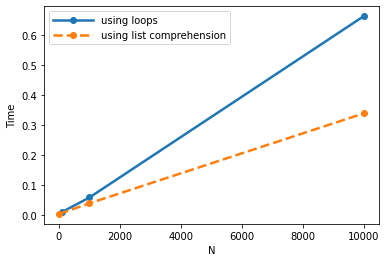

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots()

# Plot line for using loop method
line1, = ax.plot([100,1000,10000], [time_100_forloop,time_1000_forloop,time_10000_forloop], '-o',label='using loops')

# Plot line for using list comprehension method
line2, = ax.plot([10,1000,10000], [time_100_list,time_1000_list,time_10000_list], '--o', label='using list comprehension')

ax.legend(handlelength=4)
ax.set_xlabel("N")
ax.set_ylabel("Time")
plt.show()

5. What conclusions can you draw from the results?

From the figure, we can find that using list comprehension is faster than using loop, and the difference becomes more obvious as N increases. 

### Exercise 2: The Collections Library

Create a function that returns the "beauty" of a string.

1. Create a function that returns the "beauty" of a string using a defaultdict (from the Collections library) to store the counts. Apply it to the three test cases.

In [9]:
from collections import defaultdict

def beauty_defaultdic(s):
    # clean the string
    s="".join(filter(str.isalpha, s))
    s = s.lower()
    
    # Create a defaultdict to store character counts
    char_counts = defaultdict(int)
    # Count the occurrences of each character in the input string
    for char in s:
        char_counts[char] += 1
    
    # Sort the dic by counts
    sorted_char_counts = sorted(char_counts, key=lambda char: char_counts[char], reverse=True)

    # Calculate beauty score
    beauty = 26
    beauty_score = 0
    for char in sorted_char_counts:
        beauty_score += beauty * char_counts[char]
        beauty -= 1

    return beauty_score

In [10]:
# Example
print("ABbCcc:",beauty_defaultdic("ABbCcc"))
print("Ignore punctuation, please :):",beauty_defaultdic("Ignore punctuation, please :)"))
print("Sometimes test cases are hard to make up.:",beauty_defaultdic("Sometimes test cases are hard to make up."))

ABbCcc: 152
Ignore punctuation, please :): 491
Sometimes test cases are hard to make up.: 729


2. Create a function that returns the "beauty" of a string using Counter (from the Collections library) to store the counts. Apply it to the three test cases.

In [11]:
from collections import Counter

def beauty_Counter(s):
    # clean the string
    s="".join(filter(str.isalpha, s))
    s = s.lower()
    
    # Use counter to find the character counts
    char_counts = Counter(s)
    
    # Sort the dic by counts
    sorted_char_counts = sorted(char_counts, key=lambda char: char_counts[char], reverse=True)

    # Calculate beauty score
    beauty = 26
    beauty_score = 0
    for char in sorted_char_counts:
        beauty_score += beauty * char_counts[char]
        beauty -= 1

    return beauty_score

In [12]:
# Example
print("ABbCcc:",beauty_Counter("ABbCcc"))
print("Ignore punctuation, please :):",beauty_Counter("Ignore punctuation, please :)"))
print("Sometimes test cases are hard to make up.:",beauty_Counter("Sometimes test cases are hard to make up."))

ABbCcc: 152
Ignore punctuation, please :): 491
Sometimes test cases are hard to make up.: 729


3. Compare the two solutions. Explain which one you think is better.

In [13]:
# wrap the funstions
def wrapper_solution_defaultdic():
    beauty_defaultdic(s)

def wrapper_solution_Counter():
    beauty_Counter(s)

# time some examples
s = "ABbCcc"
time_d_1 = timeit.timeit(wrapper_solution_defaultdic, number=10000)
time_c_1 = timeit.timeit(wrapper_solution_Counter, number=10000)
s = "Ignore punctuation, please"
time_d_2 = timeit.timeit(wrapper_solution_defaultdic, number=10000)
time_c_2 = timeit.timeit(wrapper_solution_Counter, number=10000)
s = "Sometimes test cases are hard to make up."
time_d_3 = timeit.timeit(wrapper_solution_defaultdic, number=10000)
time_c_3 = timeit.timeit(wrapper_solution_Counter, number=10000)
s = "Sometimes test cases are hard to make up and answers are hard to come up as well, so i am trying to type some non sense words to make this sentence longer."
time_d_4 = timeit.timeit(wrapper_solution_defaultdic, number=10000)
time_c_4 = timeit.timeit(wrapper_solution_Counter, number=10000)

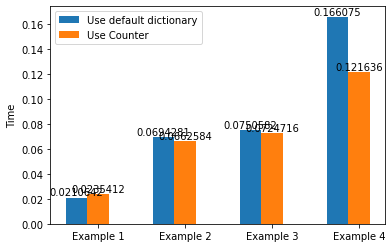

In [14]:
# plot the time difference of the two methods in these three examples
import matplotlib.pyplot as plt
import numpy as np

examples = ("Example 1", "Example 2","Example 3","Example 4")
time_dic = {
    'Use default dictionary': (time_d_1,time_d_2,time_d_3,time_d_4),
    'Use Counter': (time_c_1,time_c_2,time_c_3,time_c_4)
}

fig, ax = plt.subplots()

x = np.arange(len(examples))
multiplier = 0
width=0.25
for method, t in time_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, t, width, label=method)
    ax.bar_label(rects)
    multiplier += 1

ax.set_ylabel('Time')
ax.set_xticks(x + width, examples)
ax.legend(loc='upper left')

I think the one use Counter is better since it looks more concise and it takes less time when the sentence is long. 

### Exercise 3: Explore a Library

Pick an extension library from PyPI or other sources (something of interest to you). Summarize the functionality provided by the library (one paragraph) and show a usage example.

One of the interesting Python libraries from PyPI is Beautiful Soup. Beautiful Soup is for web scraping, which helps to extract useful information from HTML and XML documents. It can navigate and search the parse tree, filter elements based on various criteria, such as tag names and text content. It modify the parse tree by adding, removing, or modifying tags and attributes.

In [15]:
# Example
from bs4 import BeautifulSoup
import requests

# make a request to a website and get html
response = requests.get("https://www.google.com")
html_content = response.text

# parse the html content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find and print the title of the webpage
title = soup.title.text
print("Title of the webpage:", title)

# Find all the links on the webpage and print their text and href attributes
links = soup.find_all("a")
for link in links:
    link_text = link.text
    href = link.get("href")
    print(f"Link Text: {link_text}, Href: {href}")

Title of the webpage: Google
Link Text: Images, Href: https://www.google.com/imghp?hl=en&tab=wi
Link Text: Maps, Href: https://maps.google.com/maps?hl=en&tab=wl
Link Text: Play, Href: https://play.google.com/?hl=en&tab=w8
Link Text: YouTube, Href: https://www.youtube.com/?tab=w1
Link Text: News, Href: https://news.google.com/?tab=wn
Link Text: Gmail, Href: https://mail.google.com/mail/?tab=wm
Link Text: Drive, Href: https://drive.google.com/?tab=wo
Link Text: More », Href: https://www.google.com/intl/en/about/products?tab=wh
Link Text: Web History, Href: http://www.google.com/history/optout?hl=en
Link Text: Settings, Href: /preferences?hl=en
Link Text: Sign in, Href: https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/&ec=GAZAAQ
Link Text: Advanced search, Href: /advanced_search?hl=en&authuser=0
Link Text: New privacy tools to help you, Href: https://www.google.com/url?q=https://blog.google/products/search/new-privacy-tools/&source=hpp&id=1903887

This example use Beautiful Soup to scrape the Google webpage (https://www.google.com). It makes a request to the website, parses the HTML content, finds the title of the webpage, and extracts all the links, printing their text and href attributes.